In [2]:
from rich import print as rprint
from rich.console import Console
from rich.panel import Panel
from rich.table import Table
import glob

console = Console()

import pandas as pd

# start_chunk = 0
# end_chunk = start_chunk + 100000
# df = pd.read_csv(f'2025_csv/new_amplitude_export_2025_chunk_{start_chunk}_{end_chunk}.csv')

def load_data(year=2025):
    """Load all CSV chunks for a given year and combine them into a single DataFrame."""
    csv_files = glob.glob(f"{year}_csv/*_chunk_*.csv")
    dfs = []
    for file in csv_files:
        df = pd.read_csv(file)
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

df = load_data()

In [3]:
time_cols = ['client_event_time', 'client_upload_time', 'processed_time', 
             'server_received_time', 'server_upload_time']
for col in time_cols:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d %H:%M:%S.%f')

df['session_duration'] = (df.groupby('session_id')['client_event_time']
                         .transform(lambda x: x.max() - x.min()))

In [6]:
df['session_duration'].describe()

count                      1850109
mean     0 days 01:27:18.059801343
std      0 days 01:45:39.413711995
min                0 days 00:00:00
25%         0 days 00:15:00.616000
50%         0 days 00:52:43.826000
75%         0 days 01:57:25.307000
max         1 days 01:27:38.926000
Name: session_duration, dtype: object

In [7]:
print(df['session_duration'].min())
df[df['session_duration'] == df['session_duration'].min()].shape

0 days 00:00:00


(5417, 31)

In [8]:
# 1. Basic Dataset Information
# https://rich.readthedocs.io/en/stable/appendix/colors.html to refer to colors
console.print("\n[bold bright_green]1. Basic Dataset Information[/bold bright_green]", style="bold")
console.print(Panel(f"Dataset Shape: {df.shape}"))
console.print("\n[bright_yellow]Columns:[/bright_yellow]", df.columns.tolist())
console.print("\n[bright_yellow]Data Types:[/bright_yellow]")
console.print(df.dtypes)
console.print("\n[bright_yellow]Missing Values:[/bright_yellow]")
console.print(df.isnull().sum())

1. Basic Dataset Information

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Dataset Shape: (1850109, 31)                                                                                    │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Columns:
[
    '$insert_id',
    'amplitude_id',
    'app',
    'city',
    'client_event_time',
    'client_upload_time',
    'country',
    'data',
    'data_type',
    'device_family',
    'device_id',
    'device_type',
    'dma',
    'event_id',
    'event_properties',
    'event_time',
    'event_type',
    'language',
    'library',
    'os_name',
    'os_version',
    'platform',
    'processed_time',
    'region',
    'server_received_time',
    'server_upload_time',
    'session_id',
    'user_id',
    'user_properties',
    'uuid',
    'session_duration'
]

Data Types:

$insert_id                       object
amplitude_id                      int64
app                               int64
city                             object
client_event_time        datetime64[ns]
client_upload_time       datetime64[ns]
country                          object
data                             object
data_type                        object
device_family                    object
device_id                        object
device_type                      object
dma                              object
event_id                          int64
event_properties                 object
event_time                       object
event_type                       object
language                         object
library                          object
os_name                          object
os_version                        int64
platform                         object
processed_time           datetime64[ns]
region                           object
server_received_time     datetime64[ns]
server_upload_time       datetime64[ns]
session_id                        int64
user_id                          object
user_properties                  object
uuid                             object
session_duration        timedelta64[ns]
dtype: object

Missing Values:

$insert_id                   0
amplitude_id                 0
app                          0
city                     33543
client_event_time            0
client_upload_time           0
country                      0
data                         0
data_type                    0
device_family                0
device_id                    0
device_type             290193
dma                     512300
event_id                     0
event_properties             0
event_time                   0
event_type                   0
language                     0
library                      0
os_name                      0
os_version                   0
platform                     0
processed_time               0
region                   16521
server_received_time         0
server_upload_time           0
session_id                   0
user_id                   7389
user_properties              0
uuid                         0
session_duration             0
dtype: int64

In [9]:
# 2. User Activity Analysis
console.print("\n[bold bright_green]2. User Activity Analysis[/bold bright_green]", style="bold")
stats_table = Table(show_header=True, header_style="bold bright_yellow")
stats_table.add_column("Metric")
stats_table.add_column("Value")
stats_table.add_row("Unique Users", str(df['user_id'].nunique()))
stats_table.add_row("Unique Sessions", str(df['session_id'].nunique()))
stats_table.add_row("Events per User (Average)", f"{len(df) / df['user_id'].nunique():.2f}")
console.print(stats_table)

2. User Activity Analysis

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Metric                    ┃ Value   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ Unique Users              │ 868     │
│ Unique Sessions           │ 59868   │
│ Events per User (Average) │ 2131.46 │
└───────────────────────────┴─────────┘

In [10]:
# 3. Device & Platform Distribution
console.print("\n[bold bright_green]3. Device & Platform Distribution[/bold bright_green]", style="bold")
console.print("\n[bright_yellow]Device Distribution:[/bright_yellow]")
console.print(Panel(str(df['device_family'].value_counts(normalize=True).round(3) * 100)))
console.print("\n[bright_yellow]Platform Distribution:[/bright_yellow]")
console.print(Panel(str(df['platform'].value_counts(normalize=True).round(3) * 100)))

3. Device & Platform Distribution

Device Distribution:

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ device_family                                                                                                   │
│ Windows     81.8                                                                                                │
│ Mac OS X    15.6                                                                                                │
│ Linux        2.5                                                                                                │
│ iOS          0.1                                                                                                │
│ Android      0.0                                                                                                │
│ Name: proportion, dtype: float64                                                                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Platform Distribution:

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ platform                                                                                                        │
│ Web    100.0                                                                                                    │
│ Name: proportion, dtype: float64                                                                                │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [11]:
# 4. Geographic Distribution
console.print("\n[bold bright_green]4. Geographic Distribution[/bold bright_green]", style="bold")
console.print("\n[bright_yellow]Top 10 Cities:[/bright_yellow]")
console.print(Panel(str(df['city'].value_counts().head(10))))

console.print("\n[bright_yellow]State/Region Distribution:[/bright_yellow]")
console.print(Panel(str(df['region'].value_counts().head(10))))

4. Geographic Distribution

Top 10 Cities:

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ city                                                                                                            │
│ Mumbai         399477                                                                                           │
│ Nashville      286693                                                                                           │
│ Spring Hill     74781                                                                                           │
│ Chicago         71692                                                                                           │
│ Birmingham      49854                                                                                           │
│ Greenville      45706                                                                                           │
│ Alexandria      38848                                                                                           │
│ Wroclaw         33788                                                                                           │
│ Phoenix         31894                                                                                           │
│ Des Moines      27699                                                                                           │
│ Name: count, dtype: int64                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

State/Region Distribution:

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ region                                                                                                          │
│ Maharashtra       399477                                                                                        │
│ Tennessee         383475                                                                                        │
│ Illinois          103032                                                                                        │
│ Iowa               95680                                                                                        │
│ Georgia            75776                                                                                        │
│ South Carolina     74163                                                                                        │
│ Virginia           70494                                                                                        │
│ Alabama            68398                                                                                        │
│ California         66066                                                                                        │
│ Florida            60664                                                                                        │
│ Name: count, dtype: int64                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [12]:
# 5. Temporal Analysis
df['hour'] = df['client_event_time'].dt.hour
df['day_of_week'] = df['client_event_time'].dt.day_name()

console.print("\n[bold bright_green]5. Temporal Analysis[/bold bright_green]", style="bold")
console.print("\n[bright_yellow]Events by Hour of Day:[/bright_yellow]")
console.print(Panel(str(df['hour'].value_counts().sort_index())))

console.print("\n[bright_yellow]Events by Day of Week:[/bright_yellow]") 
console.print(Panel(str(df['day_of_week'].value_counts())))

5. Temporal Analysis

Events by Hour of Day:

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ hour                                                                                                            │
│ 0      17412                                                                                                    │
│ 1      13352                                                                                                    │
│ 2      11367                                                                                                    │
│ 3      15187                                                                                                    │
│ 4      35544                                                                                                    │
│ 5      52265                                                                                                    │
│ 6      55000                                                                                                    │
│ 7      54778                                                                                                    │
│ 8      56650                                                                                                    │
│ 9      55150                                                                                                    │
│ 10     65470                                                                                                    │
│ 11     64175                                                                                                    │
│ 12     67925                                                                                                    │
│ 13     91591                                                                                                    │
│ 14    133045                                                                                                    │
│ 15    160241                                                                                                    │
│ 16    151129                                                                                                    │
│ 17    131961                                                                                                    │
│ 18    121523                                                                                                    │
│ 19    137684                                                                                                    │
│ 20    131027                                                                                                    │
│ 21    113741                                                                                                    │
│ 22     76740                                                                                                    │
│ 23     37152                                                                                                    │
│ Name: count, dtype: int64                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Events by Day of Week:

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ day_of_week                                                                                                     │
│ Thursday     406228                                                                                             │
│ Tuesday      380958                                                                                             │
│ Friday       363600                                                                                             │
│ Monday       353517                                                                                             │
│ Wednesday    302410                                                                                             │
│ Saturday      25515                                                                                             │
│ Sunday        17881                                                                                             │
│ Name: count, dtype: int64                                                                                       │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [13]:
# 6. Session Analysis
console.print("\n[bold bright_green]6. Session Analysis[/bold bright_green]", style="bold")
console.print("\n[bright_yellow]Session Duration Statistics (in minutes):[/bright_yellow]")
stats_table = Table(show_header=True, header_style="bold bright_yellow")
stats_table.add_column("Metric")
stats_table.add_column("Value")

session_stats = df['session_duration'].dt.total_seconds().div(60).describe()
for stat, value in session_stats.items():
    stats_table.add_row(stat, f"{value:.2f}")

console.print(stats_table)

6. Session Analysis

Session Duration Statistics (in minutes):

┏━━━━━━━━┳━━━━━━━━━━━━┓
┃ Metric ┃ Value      ┃
┡━━━━━━━━╇━━━━━━━━━━━━┩
│ count  │ 1850109.00 │
│ mean   │ 87.30      │
│ std    │ 105.66     │
│ min    │ 0.00       │
│ 25%    │ 15.01      │
│ 50%    │ 52.73      │
│ 75%    │ 117.42     │
│ max    │ 1527.65    │
└────────┴────────────┘

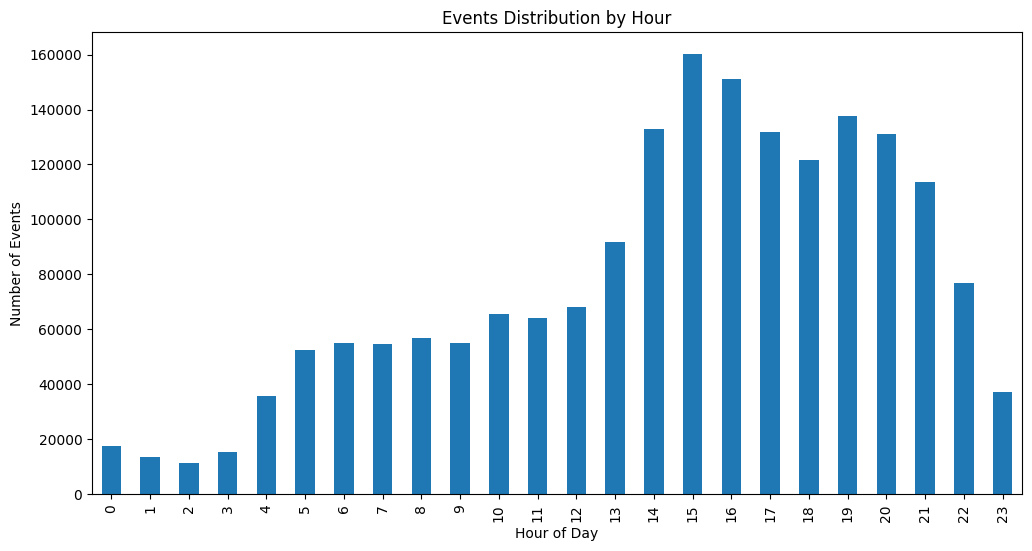

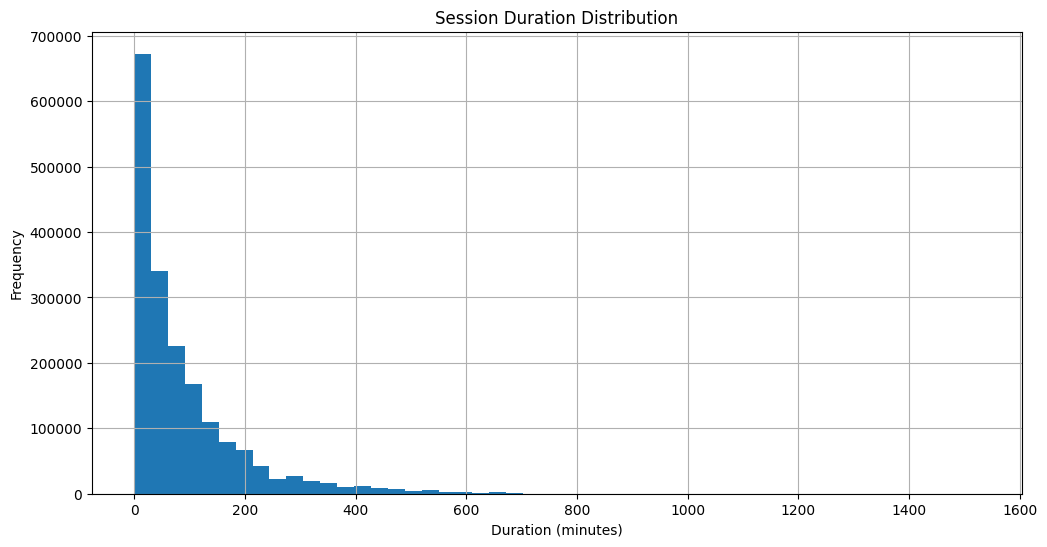

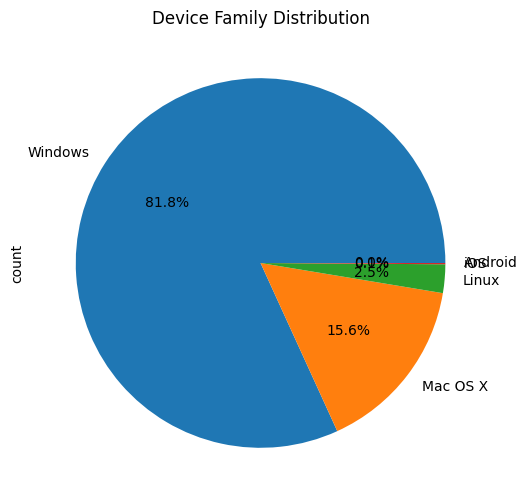

In [14]:
# 7. Create some visualizations using matplotlib
import matplotlib.pyplot as plt

# Events by Hour
plt.figure(figsize=(12, 6))
df['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Events Distribution by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.show()

# Session Duration Distribution
plt.figure(figsize=(12, 6))
df['session_duration'].dt.total_seconds().div(60).hist(bins=50)
plt.title('Session Duration Distribution')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

# Device Family Distribution
plt.figure(figsize=(10, 6))
df['device_family'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Device Family Distribution')
plt.show()

In [15]:
# 8. Statistical Summary
console.print("\n[bold bright_green]8. Statistical Summary[/bold bright_green]", style="bold")
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
console.print("\n[bright_yellow]Numeric Columns Summary:[/bright_yellow]")
stats_df = df[numeric_cols].describe()
console.print(Panel(str(stats_df)))

8. Statistical Summary

Numeric Columns Summary:

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│        amplitude_id        app      event_id    os_version    session_id                                        │
│ count  1.850109e+06  1850109.0  1.850109e+06  1.850109e+06  1.850109e+06                                        │
│ mean   9.249715e+11   591532.0  2.467088e+04  1.309072e+02  1.736952e+12                                        │
│ std    8.423445e+10        0.0  2.962611e+04  4.288231e+00  7.897269e+08                                        │
│ min    8.575404e+11   591532.0  0.000000e+00  4.000000e+00  1.713878e+12                                        │
│ 25%    8.575405e+11   591532.0  5.088000e+03  1.310000e+02  1.736367e+12                                        │
│ 50%    8.642186e+11   591532.0  1.448900e+04  1.310000e+02  1.736951e+12                                        │
│ 75%    1.018933e+12   591532.0  3.473700e+04  1.310000e+02  1.737569e+12                                        │
│ max    1.110665e+12   591532.0  1.977430e+05  1.340000e+02  1.738098e+12                                        │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [16]:
# 9. Correlation Analysis
console.print("\n[bold bright_green]9. Correlation Analysis[/bold bright_green]", style="bold")
if len(numeric_cols) > 1:
    correlation = df[numeric_cols].corr()
    console.print("\n[bright_yellow]Correlation Matrix:[/bright_yellow]")
    console.print(Panel(str(correlation.round(2))))

9. Correlation Analysis

Correlation Matrix:

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│               amplitude_id  app  event_id  os_version  session_id                                               │
│ amplitude_id          1.00  NaN     -0.24       -0.00        0.04                                               │
│ app                    NaN  NaN       NaN         NaN         NaN                                               │
│ event_id             -0.24  NaN      1.00        0.04        0.04                                               │
│ os_version           -0.00  NaN      0.04        1.00        0.04                                               │
│ session_id            0.04  NaN      0.04        0.04        1.00                                               │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [17]:
# 10. Category Analysis (for categorical columns)
console.print("\n[bold bright_green]10. Category Analysis[/bold bright_green]", style="bold")
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    console.print(f"\n[bright_yellow]Distribution of {col}:[/bright_yellow]")
    value_counts = df[col].value_counts().head(10)  # Top 10 categories
    counts_table = Table(show_header=True, header_style="bold bright_yellow")
    counts_table.add_column("Category")
    counts_table.add_column("Count")
    counts_table.add_column("Percentage")
    
    for idx, (cat, count) in enumerate(value_counts.items()):
        percentage = (count / len(df)) * 100
        counts_table.add_row(
            str(cat),
            str(count),
            f"{percentage:.2f}%"
        )
    console.print(counts_table)

10. Category Analysis

Distribution of $insert_id:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                             ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ 77c8efdb-f5bc-4a17-a59d-e9813cd39270 │ 2     │ 0.00%      │
│ 538ab3f8-09df-4750-90e0-abe8ad8f6a0c │ 1     │ 0.00%      │
│ 5dae3311-affb-422c-8fec-1c5539b68912 │ 1     │ 0.00%      │
│ 5df0bfb2-6999-43fb-b883-17ef72d258ad │ 1     │ 0.00%      │
│ 522d2ce9-6ba9-49ae-9add-cbae2861755d │ 1     │ 0.00%      │
│ 5f811132-d67d-4139-9cc6-d93ac287f844 │ 1     │ 0.00%      │
│ 3568cc57-a8d6-4748-8d09-51f49a66425d │ 1     │ 0.00%      │
│ 84953257-d359-45db-abaf-a60e6934ae2b │ 1     │ 0.00%      │
│ 31b62123-c9ae-48b2-b774-4e129edc59c0 │ 1     │ 0.00%      │
│ 6570d130-dc26-4d32-8138-aacb117a4633 │ 1     │ 0.00%      │
└──────────────────────────────────────┴───────┴────────────┘

Distribution of city:

┏━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category    ┃ Count  ┃ Percentage ┃
┡━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━┩
│ Mumbai      │ 399477 │ 21.59%     │
│ Nashville   │ 286693 │ 15.50%     │
│ Spring Hill │ 74781  │ 4.04%      │
│ Chicago     │ 71692  │ 3.88%      │
│ Birmingham  │ 49854  │ 2.69%      │
│ Greenville  │ 45706  │ 2.47%      │
│ Alexandria  │ 38848  │ 2.10%      │
│ Wroclaw     │ 33788  │ 1.83%      │
│ Phoenix     │ 31894  │ 1.72%      │
│ Des Moines  │ 27699  │ 1.50%      │
└─────────────┴────────┴────────────┘

Distribution of country:

┏━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category       ┃ Count   ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━┩
│ United States  │ 1370823 │ 74.09%     │
│ India          │ 399503  │ 21.59%     │
│ Poland         │ 52844   │ 2.86%      │
│ Canada         │ 23210   │ 1.25%      │
│ Mexico         │ 2782    │ 0.15%      │
│ United Kingdom │ 526     │ 0.03%      │
│ Costa Rica     │ 167     │ 0.01%      │
│ Singapore      │ 101     │ 0.01%      │
│ France         │ 78      │ 0.00%      │
│ Puerto Rico    │ 27      │ 0.00%      │
└────────────────┴─────────┴────────────┘

Distribution of data:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                                                                                 ┃ Count   ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━┩
│ {'path': '/2/httpapi', 'group_first_event': {}, 'group_ids': {}}                         │ 1830130 │ 98.92%     │
│ {'path': '/2/httpapi', 'user_properties_updated': 'True', 'group_first_event': {},       │ 19979   │ 1.08%      │
│ 'group_ids': {}}                                                                         │         │            │
└──────────────────────────────────────────────────────────────────────────────────────────┴─────────┴────────────┘

Distribution of data_type:

┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category ┃ Count   ┃ Percentage ┃
┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━┩
│ event    │ 1850109 │ 100.00%    │
└──────────┴─────────┴────────────┘

Distribution of device_family:

┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category ┃ Count   ┃ Percentage ┃
┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━┩
│ Windows  │ 1513654 │ 81.81%     │
│ Mac OS X │ 288172  │ 15.58%     │
│ Linux    │ 46239   │ 2.50%      │
│ iOS      │ 2021    │ 0.11%      │
│ Android  │ 23      │ 0.00%      │
└──────────┴─────────┴────────────┘

Distribution of device_id:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                             ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ 3aec3262-1bdd-4f39-ae25-5df72f3fbae6 │ 24486 │ 1.32%      │
│ a8806aff-7404-4c48-96f3-6bce38fe5f66 │ 22406 │ 1.21%      │
│ 3630e88e-c688-4abc-b81d-11da1cbebf47 │ 21747 │ 1.18%      │
│ 08deb711-f4f2-40f6-8939-e1673bf4e84c │ 21036 │ 1.14%      │
│ 107661f8-dbfb-4e97-9ad4-b97218423080 │ 20382 │ 1.10%      │
│ 0e96d208-bf73-44c8-be78-a74c1123c3f9 │ 20371 │ 1.10%      │
│ f32dd30f-34a2-48a9-8905-cce8ab9ec449 │ 19966 │ 1.08%      │
│ a8bf97c2-480e-41a2-bce9-9b54b4c10b01 │ 17661 │ 0.95%      │
│ d74d587c-f0b5-4a9e-8e56-cd0801842932 │ 17093 │ 0.92%      │
│ 5bb73f50-5f95-4c9f-92a8-a81b65f6bda1 │ 16073 │ 0.87%      │
└──────────────────────────────────────┴───────┴────────────┘

Distribution of device_type:

┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category ┃ Count   ┃ Percentage ┃
┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━┩
│ Windows  │ 1513654 │ 81.81%     │
│ Linux    │ 46239   │ 2.50%      │
│ Android  │ 23      │ 0.00%      │
└──────────┴─────────┴────────────┘

Distribution of dma:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                           ┃ Count  ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━┩
│ Nashville, TN                      │ 366592 │ 19.81%     │
│ Chicago, IL                        │ 94724  │ 5.12%      │
│ Des Moines-Ames, IA                │ 83549  │ 4.52%      │
│ Greenville-Spartanburg, SC         │ 69668  │ 3.77%      │
│ Atlanta, GA                        │ 67746  │ 3.66%      │
│ Birmingham, AL                     │ 67256  │ 3.64%      │
│ New York, NY                       │ 63715  │ 3.44%      │
│ Washington, DC (Hagerstown, MD)    │ 62809  │ 3.39%      │
│ Phoenix, AZ                        │ 49749  │ 2.69%      │
│ San Francisco-Oakland-San Jose, CA │ 31538  │ 1.70%      │
└────────────────────────────────────┴────────┴────────────┘

Distribution of event_properties:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                                                                                  ┃ Count  ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━┩
│ {}                                                                                        │ 134094 │ 7.25%      │
│ {'rowModel': 'client', 'slug': 'documents-and-compliance-table'}                          │ 17627  │ 0.95%      │
│ {'slug': 'my-book'}                                                                       │ 5397   │ 0.29%      │
│ {'slug': 'general'}                                                                       │ 4911   │ 0.27%      │
│ {'rowModel': 'client', 'id': 'de54a567-d72b-44a9-8658-15c4a0299738'}                      │ 4596   │ 0.25%      │
│ {'displayName': 'Basic Vehicle Details (Policy)', 'tableId':                              │ 4595   │ 0.25%      │
│ 'de54a567-d72b-44a9-8658-15c4a0299738', 'id': 'b87fadc2-83ff-4d76-b940-3dd78d0df21f',     │        │            │
│ 'type': 'table'}                                                                          │        │            │
│ {'displayName': 'Policy Detail Card', 'id': 'e59fbad1-399d-41fe-9c99-f4158e175c01',       │ 3994   │ 0.22%      │
│ 'type': 'built-in', 'slug': 'policy-detail-card'}                                         │        │            │
│ {'slug': 'auto'}                                                                          │ 3868   │ 0.21%      │
│ {'rowModel': 'legacyServer', 'slug': 'submission-history'}                                │ 3481   │ 0.19%      │
│ {'rowModel': 'client', 'id': '0d0df5a0-0460-45c8-b3e9-843abd1dd88e'}                      │ 3344   │ 0.18%      │
└───────────────────────────────────────────────────────────────────────────────────────────┴────────┴────────────┘

Distribution of event_time:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                   ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ 2024-06-27 13:48:19.271000 │ 432   │ 0.02%      │
│ 2024-09-10 04:43:50.596000 │ 257   │ 0.01%      │
│ 2024-12-19 19:03:01.542000 │ 186   │ 0.01%      │
│ 2024-04-23 13:09:22.416000 │ 179   │ 0.01%      │
│ 2025-01-24 18:01:29.934000 │ 73    │ 0.00%      │
│ 2024-10-01 18:00:43.174000 │ 52    │ 0.00%      │
│ 2024-08-12 17:16:07.950000 │ 48    │ 0.00%      │
│ 2024-12-24 21:28:22.671000 │ 44    │ 0.00%      │
│ 2024-05-16 01:53:12.545000 │ 30    │ 0.00%      │
│ 2024-11-20 18:40:12.806000 │ 29    │ 0.00%      │
└────────────────────────────┴───────┴────────────┘

Distribution of event_type:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                                    ┃ Count  ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━┩
│ account-lines::widget:render                │ 428058 │ 23.14%     │
│ account-lines::configurable-table:render    │ 257224 │ 13.90%     │
│ account-lines:::view                        │ 108249 │ 5.85%      │
│ dashboard:my-book:configurable-table:render │ 105443 │ 5.70%      │
│ account-lines::layout:render                │ 104682 │ 5.66%      │
│ dashboard:my-book:widget:render             │ 99140  │ 5.36%      │
│ account:::view                              │ 64694  │ 3.50%      │
│ session_start                               │ 58762  │ 3.18%      │
│ session_end                                 │ 51610  │ 2.79%      │
│ application-window-opened                   │ 47245  │ 2.55%      │
└─────────────────────────────────────────────┴────────┴────────────┘

Distribution of language:

┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category ┃ Count   ┃ Percentage ┃
┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━┩
│ English  │ 1826082 │ 98.70%     │
│ Polish   │ 22051   │ 1.19%      │
│ Spanish  │ 1976    │ 0.11%      │
└──────────┴─────────┴────────────┘

Distribution of library:

┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category           ┃ Count   ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━┩
│ amplitude-ts/2.7.2 │ 1850109 │ 100.00%    │
└────────────────────┴─────────┴────────────┘

Distribution of os_name:

┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category          ┃ Count   ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━┩
│ Chrome            │ 1707543 │ 92.29%     │
│ Edge              │ 131340  │ 7.10%      │
│ Firefox           │ 8543    │ 0.46%      │
│ Mobile Safari     │ 1822    │ 0.10%      │
│ Safari            │ 637     │ 0.03%      │
│ Chrome Mobile iOS │ 163     │ 0.01%      │
│ Edge Mobile       │ 36      │ 0.00%      │
│ Chrome Mobile     │ 22      │ 0.00%      │
│ HeadlessChrome    │ 2       │ 0.00%      │
│ android           │ 1       │ 0.00%      │
└───────────────────┴─────────┴────────────┘

Distribution of platform:

┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category ┃ Count   ┃ Percentage ┃
┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━┩
│ Web      │ 1850109 │ 100.00%    │
└──────────┴─────────┴────────────┘

Distribution of region:

┏━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category       ┃ Count  ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━┩
│ Maharashtra    │ 399477 │ 21.59%     │
│ Tennessee      │ 383475 │ 20.73%     │
│ Illinois       │ 103032 │ 5.57%      │
│ Iowa           │ 95680  │ 5.17%      │
│ Georgia        │ 75776  │ 4.10%      │
│ South Carolina │ 74163  │ 4.01%      │
│ Virginia       │ 70494  │ 3.81%      │
│ Alabama        │ 68398  │ 3.70%      │
│ California     │ 66066  │ 3.57%      │
│ Florida        │ 60664  │ 3.28%      │
└────────────────┴────────┴────────────┘

Distribution of user_id:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                             ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ 0c4896b7-08fa-4cb4-852f-27ad584f0864 │ 45035 │ 2.43%      │
│ 1b992a40-b2c3-4b69-a5bc-05711eeddd80 │ 39783 │ 2.15%      │
│ EMPTY                                │ 31120 │ 1.68%      │
│ bb8fa1af-a540-4d0f-a633-569c61f01281 │ 26015 │ 1.41%      │
│ e309f160-ed02-4c6c-84bb-33bab8749186 │ 24486 │ 1.32%      │
│ 1b7f0cbc-e5b9-494f-af08-f8e19df60576 │ 22362 │ 1.21%      │
│ c774e8c0-4817-4b51-962a-ac7c051d0470 │ 21852 │ 1.18%      │
│ b5e87951-22bd-4333-9a0d-ae28ecabe804 │ 21747 │ 1.18%      │
│ cfa20420-326e-4d5a-b202-c04084e785ad │ 21036 │ 1.14%      │
│ 6066f244-0707-4e85-9fc5-70e6fefdea0b │ 20382 │ 1.10%      │
└──────────────────────────────────────┴───────┴────────────┘

Distribution of user_properties:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                                                                                  ┃ Count  ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━┩
│ {'businessUnit': [], 'initial_utm_medium': 'EMPTY', 'initial_referring_domain': 'EMPTY',  │ 512831 │ 27.72%     │
│ 'initial_utm_content': 'EMPTY', 'roles': ['underwriter'], 'isInternalUser': 'False',      │        │            │
│ 'trackingVersion': '3.1', 'initial_utm_campaign': 'EMPTY', 'initial_twclid': 'EMPTY',     │        │            │
│ 'initial_li_fat_id': 'EMPTY', 'initial_gclid': 'EMPTY', 'hostname': 'None',               │        │            │
│ 'initial_utm_source': 'EMPTY', 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY',       │        │            │
│ 'initial_rtd_cid': 'EMPTY', 'initial_fbclid': 'EMPTY', 'initial_utm_id': 'EMPTY',         │        │            │
│ 'initial_gbraid': 'EMPTY', 'initial_referrer': 'EMPTY', 'initial_msclkid': 'EMPTY',       │        │            │
│ 'initial_ttclid': 'EMPTY', 'initial_utm_term': 'EMPTY', 'initial_ko_click_id': 'EMPTY'}   │        │            │
│ {'businessUnit': [], 'roles': ['underwriter'], 'trackingVersion': '3.1',                  │ 135196 │ 7.31%      │
│ 'initial_twclid': 'EMPTY', 'initial_gclid': 'EMPTY', 'hostname': 'None',                  │        │            │
│ 'initial_utm_source': 'EMPTY', 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY',       │        │            │
│ 'initial_rtd_cid': 'EMPTY', 'initial_utm_id': 'EMPTY', 'initial_gbraid': 'EMPTY',         │        │            │
│ 'initial_msclkid': 'EMPTY', 'initial_ttclid': 'EMPTY', 'initial_ko_click_id': 'EMPTY',    │        │            │
│ 'initial_utm_medium': 'EMPTY', 'initial_referring_domain': 'EMPTY',                       │        │            │
│ 'initial_utm_content': 'EMPTY', 'isInternalUser': 'False', 'initial_utm_campaign':        │        │            │
│ 'EMPTY', 'initial_li_fat_id': 'EMPTY', 'referrer': 'https://accounts.google.com/',        │        │            │
│ 'initial_fbclid': 'EMPTY', 'initial_referrer': 'EMPTY', 'initial_utm_term': 'EMPTY',      │        │            │
│ 'referring_domain': 'accounts.google.com'}                                                │        │            │
│ {'businessUnit': [], 'roles': ['underwriter'], 'trackingVersion': '3.1',                  │ 103019 │ 5.57%      │
│ 'initial_twclid': 'EMPTY', 'initial_gclid': 'EMPTY', 'hostname': 'None',                  │        │            │
│ 'initial_utm_source': 'EMPTY', 'initial_dclid': 'EMPTY', 'initial_wbraid': 'EMPTY',       │        │            │
│ 'initial_rtd_cid': 'EMPTY', 'initial_utm_id': 'EMPTY', 'initial_gbraid': 'EMPTY',         │        │            │
│ 'initial_msclkid': 'EMPTY', 'initial_ttclid': 'EMPTY', 'initial_ko_click_id': 'EMPTY',    │        │            │
│ 'initial_utm_medium': 'EMPTY', 'initial_referring_domain': 'EMPTY',                       │        │            │
│ 'initial_utm_content': 'EMPTY', 'isInternalUser': 'False', 'initial_utm_campaign':        │        │            │
│ 'EMPTY', 'initial_li_fat_id': 'EMPTY', 'referrer': 'https://vru-auth.us.auth0.com/',      │        │            │
│ 'initial_fbclid': 'EMPTY', 'initial_referrer': 'EMPTY', 'initial_utm_term': 'EMPTY',      │        │            │
│ 'referring_domain': 'vru-auth.us.auth0.com'}                                              │        │            │
│ {'businessUnit': ['Xceedance Modeling'], 'initial_utm_medium': 'EMPTY',                   │ 85657  │ 4.63%      │
│ 'initial_referring_domain': 'EMPTY', 'initial_utm_content': 'EMPTY', 'roles':             │        │            │
│ ['underwriter'], 'isInternalUser': 'False', 'trackingVersion': '3.1',                     │        │            │
│ 'initial_utm_campaign': 'EMPTY', 'initial_twclid': 'EM

Distribution of uuid:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┓
┃ Category                             ┃ Count ┃ Percentage ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━┩
│ 006cfd50-7f9e-4ffa-85e8-720404db8247 │ 1     │ 0.00%      │
│ 4d8ada7d-b821-4df3-bb9d-8d122f6c12b9 │ 1     │ 0.00%      │
│ dcdca6e5-d3d4-490d-8ec0-90d155ba6438 │ 1     │ 0.00%      │
│ 0b3580df-51e3-4ab6-ad48-0822328fc6fd │ 1     │ 0.00%      │
│ 6bba7b30-f028-4e68-a4a1-5fca4700dcff │ 1     │ 0.00%      │
│ cbd9ed54-7a0a-4407-9aac-183cd3bc8828 │ 1     │ 0.00%      │
│ 8086ad48-5dfc-4925-ae33-b35975341dbb │ 1     │ 0.00%      │
│ 4a92c58f-1170-45e9-a8c6-cfe6d6ed8ffc │ 1     │ 0.00%      │
│ e2583cfa-1737-4bb9-bc7d-3d7c4df2e2e6 │ 1     │ 0.00%      │
│ bd3532ad-dec2-4b7d-92f9-5b1008aa6f09 │ 1     │ 0.00%      │
└──────────────────────────────────────┴───────┴────────────┘

Distribution of day_of_week:

┏━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┓
┃ Category  ┃ Count  ┃ Percentage ┃
┡━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━┩
│ Thursday  │ 406228 │ 21.96%     │
│ Tuesday   │ 380958 │ 20.59%     │
│ Friday    │ 363600 │ 19.65%     │
│ Monday    │ 353517 │ 19.11%     │
│ Wednesday │ 302410 │ 16.35%     │
│ Saturday  │ 25515  │ 1.38%      │
│ Sunday    │ 17881  │ 0.97%      │
└───────────┴────────┴────────────┘

In [18]:
# 11. Data Quality Checks
console.print("\n[bold bright_green]11. Data Quality Checks[/bold bright_green]", style="bold")
quality_table = Table(show_header=True, header_style="bold bright_yellow")
quality_table.add_column("Check")
quality_table.add_column("Result")

duplicates = df.duplicated().sum()
quality_table.add_row(
    "Duplicate Rows",
    f"[bright_yellow]{duplicates}[/bright_yellow]" if duplicates > 0 else "[bright_green]0[/bright_green]"
)

missing_pct = (df.isnull().sum() / len(df) * 100).round(2)
has_missing = missing_pct.any()
quality_table.add_row(
    "Contains Missing Values",
    "[bright_yellow]Yes[/bright_yellow]" if has_missing else "[bright_green]No[/bright_green]"
)

numeric_zeros = {col: (df[col] == 0).sum() for col in numeric_cols}
has_zeros = any(numeric_zeros.values())
quality_table.add_row(
    "Contains Zero Values",
    "[bright_yellow]Yes[/bright_yellow]" if has_zeros else "[bright_green]No[/bright_green]"
)

console.print(quality_table)

11. Data Quality Checks

┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ Check                   ┃ Result ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ Duplicate Rows          │ 0      │
│ Contains Missing Values │ Yes    │
│ Contains Zero Values    │ Yes    │
└─────────────────────────┴────────┘

In [19]:
# 12. Memory Usage
console.print("\n[bold bright_green]12. Memory Usage[/bold bright_green]", style="bold")
memory_usage = df.memory_usage(deep=True)
total_memory = memory_usage.sum() / 1024**2
console.print(Panel(f"Total Memory Usage: {total_memory:.2f} MB"))


12. Memory Usage

╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│ Total Memory Usage: 4085.98 MB                                                                                  │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯